In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
#Read csv files
boston_listings = pd.read_csv("Datasets/boston_airbnb/listings.csv")
boston_calendar = pd.read_csv("Datasets/boston_airbnb/calendar.csv")
boston_reviews = pd.read_csv("Datasets/boston_airbnb/reviews.csv")
boston_listings.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,1.70
6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,Roslindale is the new hip area of Boston. Clos...,...,9.0,f,NaN,NaN,f,strict,f,f,3,4.00
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,10.0,f,NaN,NaN,f,moderate,t,t,2,2.38
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,5.36
9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,"This neighborhood truly has it all. Good, not...",...,9.0,f,NaN,NaN,f,strict,f,f,2,1.01


In [3]:
#Size of dataset
boston_listings.shape

(3585, 95)

In [4]:
#check columns that has all missing values      
(boston_listings.isnull().sum() == boston_listings.shape[0]).sum()

4

In [5]:
#Fully empty column names
boston_listings.columns[boston_listings.isnull().all()]

Index(['neighbourhood_group_cleansed', 'has_availability', 'license',
       'jurisdiction_names'],
      dtype='object')

In [6]:
#The relation between availability and missing prices
missing_price_not_available = boston_calendar[(boston_calendar['price'].isnull()) & (boston_calendar['available'] == 'f')].shape[0]
missing_price_available = boston_calendar[(boston_calendar['price'].isnull()) & (boston_calendar['available'] == 't')].shape[0]
price_present_not_available = boston_calendar[(boston_calendar['price'].notnull()) & (boston_calendar['available'] == 'f')].shape[0]
price_present_available = boston_calendar[(boston_calendar['price'].notnull()) & (boston_calendar['available'] == 't')].shape[0]

print(f"missing price and not available = {missing_price_not_available}")
print(f"missing price and available = {missing_price_available}")
print(f"price present and not available = {price_present_not_available}")
print(f"price present and available = {price_present_available}")

missing price and not available = 665853
missing price and available = 0
price present and not available = 0
price present and available = 643037


By looking at the output above, we can  say that price value is missing only when listing is not available in **Boston Airbnb** dataset. Let's check Seatle Airbnb dataset.

In [44]:
seatle_listings = pd.read_csv("Datasets/seatle_airbnb/listings.csv")
seattle_calendar = pd.read_csv("Datasets/seatle_airbnb/calendar.csv")
seatle_reviews = pd.read_csv("Datasets/seatle_airbnb/reviews.csv")

In [45]:
#The relation between availability and missing prices
missing_price_not_available = seattle_calendar[(seattle_calendar['price'].isnull()) & (seattle_calendar['available'] == 'f')].shape[0]
missing_price_available = seattle_calendar[(seattle_calendar['price'].isnull()) & (seattle_calendar['available'] == 't')].shape[0]
price_present_not_available = seattle_calendar[(seattle_calendar['price'].notnull()) & (seattle_calendar['available'] == 'f')].shape[0]
price_present_available = seattle_calendar[(seattle_calendar['price'].notnull()) & (seattle_calendar['available'] == 't')].shape[0]

print(f"missing price and not available = {missing_price_not_available}")
print(f"missing price and available = {missing_price_available}")
print(f"price present and not available = {price_present_not_available}")
print(f"price present and available = {price_present_available}")

missing price and not available = 459028
missing price and available = 0
price present and not available = 0
price present and available = 934542


Same case is valid for Seatle Airnbn dataset. Price value is missing only when listing is not available.

In [9]:
#check data types
boston_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [10]:
#Converting data types
boston_calendar['date'] = pd.to_datetime(boston_calendar['date'])
boston_calendar['price'] = boston_calendar['price'].replace('[\$,]', '', regex=True).astype(float)
boston_calendar['available'] = boston_calendar['available'].map({'t': 1, 'f': 0})

In [46]:
#Converting data types
seattle_calendar['date'] = pd.to_datetime(seattle_calendar['date'])
seattle_calendar['price'] = seattle_calendar['price'].replace('[\$,]', '', regex=True).astype(float)
seattle_calendar['available'] = seattle_calendar['available'].map({'t': 1, 'f': 0})

In [12]:
#Check data types
boston_calendar.dtypes

listing_id             int64
date          datetime64[ns]
available              int64
price                float64
dtype: object

In [13]:
boston_calendar.sample(10)

,listing_id,date,available,price
766239,665035,2017-04-12,1,249.0
1131893,10850420,2017-04-26,0,NaN
282328,13653233,2017-02-21,0,NaN
33907,5904732,2016-10-13,0,NaN
293833,8238311,2017-08-28,1,198.0
94892,4105704,2016-09-13,0,NaN
1048702,14740708,2017-07-10,0,NaN
355580,1489289,2017-04-08,1,185.0
259401,891661,2017-08-11,1,145.0
756446,5649821,2017-03-10,1,300.0


In [47]:
#Handling missing price values by replacing NaNs with 0
boston_calendar.fillna(0, inplace=True)
seattle_calendar.fillna(0, inplace=True)

In [28]:
#Boston Airbnb Calendar Data
#Basic Summary Statistics
mean_price = boston_calendar['price'].mean()
median_price = boston_calendar['price'].median()
min_price = boston_calendar['price'].min()
max_price = boston_calendar['price'].max()
std_dev_price = boston_calendar['price'].std()

#Availability Analysis
availability_counts = boston_calendar['available'].value_counts()
availability_proportion = boston_calendar['available'].value_counts(normalize=True)

#Temporal Trends
boston_calendar['month'] = boston_calendar['date'].dt.month
average_monthly_price = boston_calendar.groupby('month')['price'].mean()

print(f"mean_price: {mean_price}")
print(f"median_price: {median_price}")
print(f"min_price: {min_price}")
print(f"max_price: {max_price}")
print(f"std_dev_price: {std_dev_price}")
print(f"availability_counts: {availability_counts}")
print(f"availability_proportion: {availability_proportion}")
print(f"average_monthly_price: {average_monthly_price}")

mean_price: 97.48990442283156
median_price: 0.0
min_price: 0.0
max_price: 7163.0
std_dev_price: 160.57521078945035
availability_counts: 0    665853
1    643037
Name: available, dtype: int64
availability_proportion: 0    0.508716
1    0.491284
Name: available, dtype: float64
average_monthly_price: month
1     103.893870
2     102.386224
3      90.251876
4      94.211266
5      93.400671
6      96.332989
7     100.113839
8     101.624831
9      73.591002
10     97.311012
11    111.078388
12    105.681045
Name: price, dtype: float64


In [48]:
#Seattle Airbnb Calendar Data
#Basic Summary Statistics
mean_price = seattle_calendar['price'].mean()
median_price = seattle_calendar['price'].median()
min_price = seattle_calendar['price'].min()
max_price = seattle_calendar['price'].max()
std_dev_price = seattle_calendar['price'].std()

#Availability Analysis
availability_counts = seattle_calendar['available'].value_counts()
availability_proportion = seattle_calendar['available'].value_counts(normalize=True)

#Temporal Trends
seattle_calendar['month'] = seattle_calendar['date'].dt.month
average_monthly_price = seattle_calendar.groupby('month')['price'].mean()

print(f"mean_price: {mean_price}")
print(f"median_price: {median_price}")
print(f"min_price: {min_price}")
print(f"max_price: {max_price}")
print(f"std_dev_price: {std_dev_price}")
print(f"availability_counts: {availability_counts}")
print(f"availability_proportion: {availability_proportion}")
print(f"average_monthly_price: {average_monthly_price}")

mean_price: 92.50720380031143
median_price: 75.0
min_price: 0.0
max_price: 1650.0
std_dev_price: 107.72948871559427
availability_counts: 1    934542
0    459028
Name: available, dtype: int64
availability_proportion: 1    0.67061
0    0.32939
Name: available, dtype: float64
average_monthly_price: month
1      69.683499
2      82.308439
3      91.233047
4      89.683700
5      94.281823
6      99.453597
7      95.377854
8      97.181255
9      96.612092
10     95.444659
11     96.879911
12    100.958803
Name: price, dtype: float64


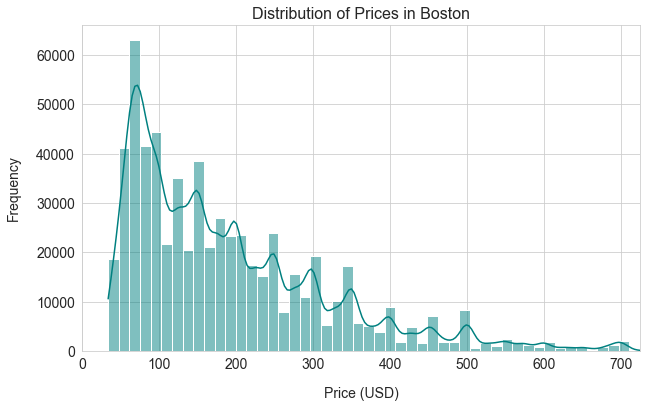

In [66]:
#Boston Airbnb Calendar Data
#Price Distribution 

# Set the style of seaborn
sns.set_style('whitegrid')

# Filter out the extreme outliers for better visualization
price_filter = boston_calendar[boston_calendar['price'] > 0]['price']
q_low = price_filter.quantile(0.01)
q_high = price_filter.quantile(0.99)
filtered_prices = price_filter[(price_filter > q_low) & (price_filter < q_high)]

# Create the plot with increased figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the histogram with a smaller bin size and include a KDE
sns.histplot(filtered_prices, bins=50, color='teal', kde=True)

# Enhancing the plot with titles and labels
plt.title("Distribution of Prices in Boston", fontsize=16)
plt.xlabel('Price (USD)', fontsize=14, labelpad=15)
plt.ylabel('Frequency', fontsize=14, labelpad=15)
plt.xlim(0, filtered_prices.max())  # Limit x-axis to the max of the filtered range

# Customize tick parameters for both axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the formatter for the y-axis to be a simple scalar (without scientific notation)
plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())

# Display the plot
plt.show()

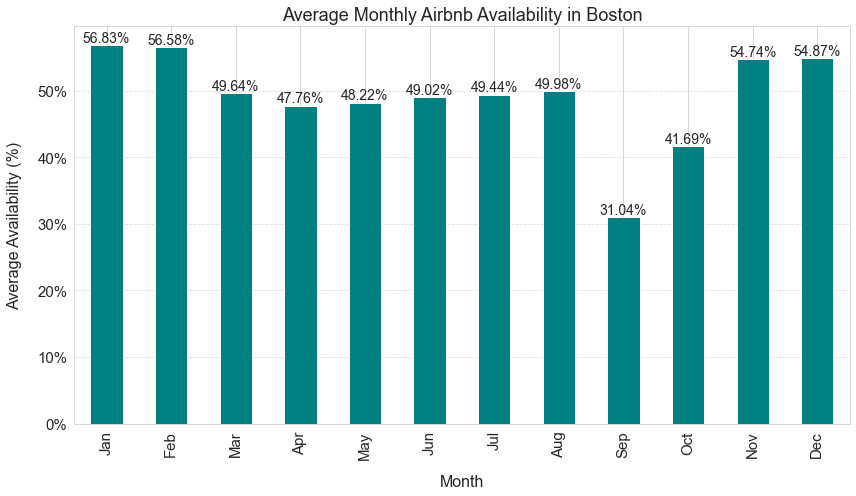

In [76]:
#Boston Airbnb Calendar Data
# Availability Over Time

# Set the figure size for better visibility
plt.figure(figsize=(12, 7))

# Group by month and calculate mean availability
availability_by_month = boston_calendar.groupby('month')['available'].mean()

# Create the bar plot
availability_by_month.plot(kind='bar', color='teal')

# Set the title and labels with improved font sizes
plt.title('Average Monthly Airbnb Availability in Boston', fontsize=18)
plt.xlabel('Month', fontsize=16, labelpad=15)
plt.ylabel('Average Availability (%)', fontsize=16, labelpad=15)

# Improve the month labels on the x-axis
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=15)
plt.yticks(fontsize=15)

# Format the y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add data labels on each bar
for index, value in enumerate(availability_by_month):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom', fontsize=14)

# Add horizontal gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot with all the improvements
plt.tight_layout()
plt.show()

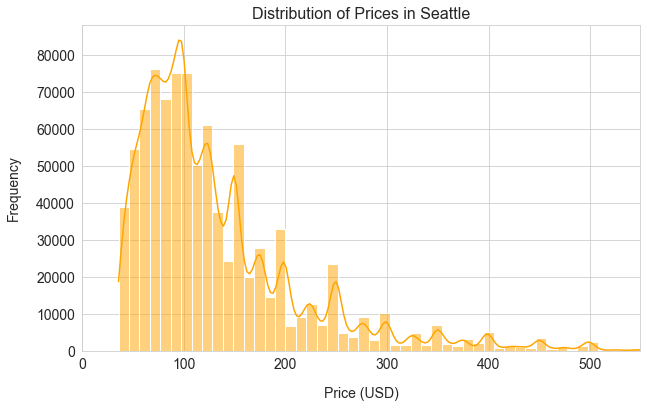

In [67]:
#Seatle Airbnb Calendar Data
# Price Distribution

# Set the style of seaborn
sns.set_style('whitegrid')

# Filter out the extreme outliers for better visualization
price_filter = seattle_calendar[seattle_calendar['price'] > 0]['price']
q_low = price_filter.quantile(0.01)
q_high = price_filter.quantile(0.99)
filtered_prices = price_filter[(price_filter > q_low) & (price_filter < q_high)]

# Create the plot with increased figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the histogram with a smaller bin size and include a KDE
sns.histplot(filtered_prices, bins=50, color='orange', kde=True)

# Enhancing the plot with titles and labels
plt.title("Distribution of Prices in Seattle", fontsize=16)
plt.xlabel('Price (USD)', fontsize=14, labelpad=15)
plt.ylabel('Frequency', fontsize=14, labelpad=15)
plt.xlim(0, filtered_prices.max())  # Limit x-axis to the max of the filtered range

# Customize tick parameters for both axes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Display the plot
plt.show()

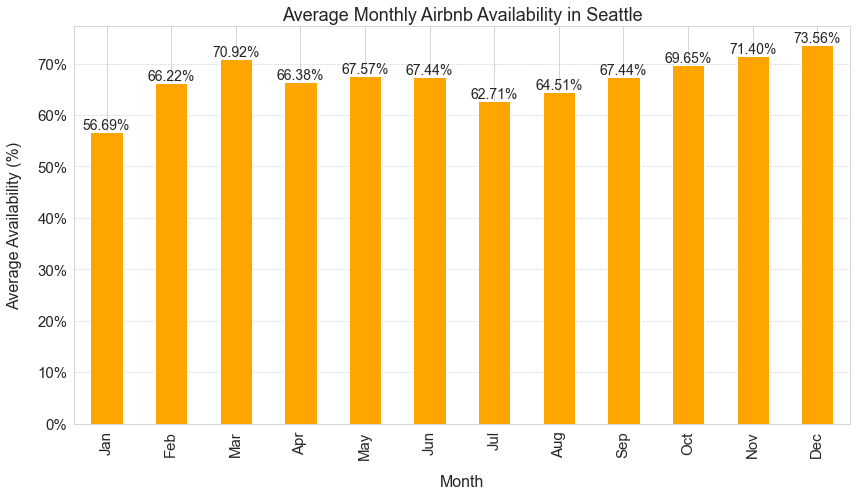

In [77]:
#Seatle Airbnb Calendar Data
#Availability Over Time

# Set the figure size for better visibility
plt.figure(figsize=(12, 7))

# Group by month and calculate mean availability
availability_by_month = seattle_calendar.groupby('month')['available'].mean()

# Create the bar plot
seattle_color = 'orange' #'#FFA500'
availability_by_month.plot(kind='bar', color=seattle_color)

# Set the title and labels with improved font sizes
plt.title('Average Monthly Airbnb Availability in Seattle', fontsize=18)
plt.xlabel('Month', fontsize=16, labelpad=15)
plt.ylabel('Average Availability (%)', fontsize=16, labelpad=15)

# Improve the month labels on the x-axis
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=15)
plt.yticks(fontsize=15)

# Format the y-axis as percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Add data labels on each bar
for index, value in enumerate(availability_by_month):
    plt.text(index, value, f'{value:.2%}', ha='center', va='bottom', fontsize=14)

# Add horizontal gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot with all the improvements
plt.tight_layout()
plt.show()

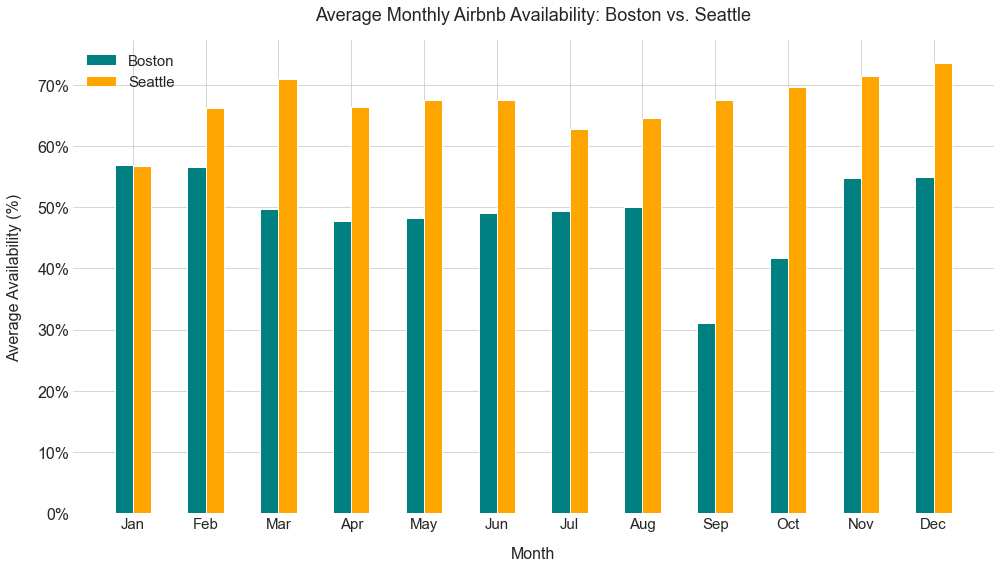

In [100]:
#Plotting availability data together
# Set the style for better visibility
sns.set_style('whitegrid')

# Data preparation
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
boston_availability = boston_calendar.groupby('month')['available'].mean()
seattle_availability = seattle_calendar.groupby('month')['available'].mean()

# Set the positions of the bars on the x-axis
r1 = np.arange(len(boston_availability))
r2 = [x + 0.25 for x in r1]

# Create the figure and the axes
plt.figure(figsize=(14, 8))

# Plot the bars
plt.bar(r1, boston_availability, color='teal', width=0.25, label='Boston')
plt.bar(r2, seattle_availability, color='orange', width=0.25, label='Seattle')

# Add titles and labels
plt.title('Average Monthly Airbnb Availability: Boston vs. Seattle', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=16, labelpad=15)
plt.ylabel('Average Availability (%)', fontsize=16, labelpad=15)
plt.xticks([r + 0.125 for r in range(len(r1))], months, fontsize=15)
plt.yticks(fontsize=16)

# Format the y-axis as a percentage
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

# Create a legend
plt.legend(fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()


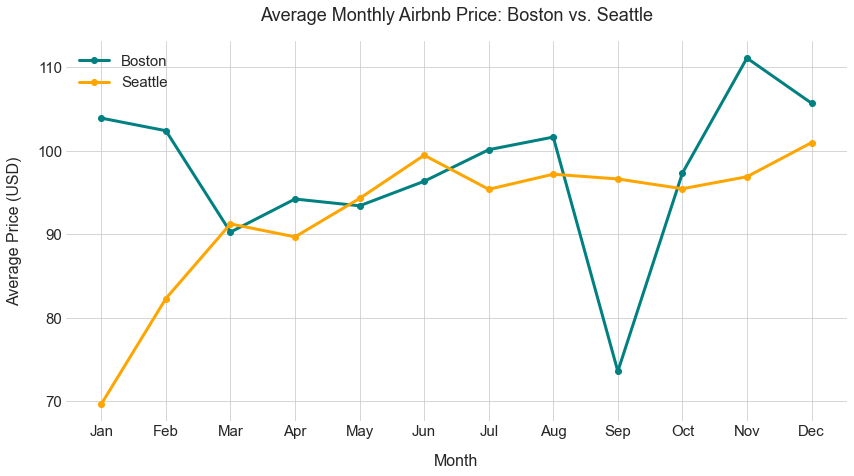

In [101]:

# Average Price Over Time
# Set the style for better visibility
sns.set_style('whitegrid')


# Calculate the average price by month for both cities
boston_avg_price = boston_calendar.groupby('month')['price'].mean()
seattle_avg_price = seattle_calendar.groupby('month')['price'].mean()

# Create the plot with increased figure size for better visibility
plt.figure(figsize=(14, 7))

# Plot Boston's average price by month
plt.plot(boston_avg_price.index, boston_avg_price.values, label='Boston', marker='o', linestyle='-', color='teal', linewidth=3)

# Plot Seattle's average price by month
plt.plot(seattle_avg_price.index, seattle_avg_price.values, label='Seattle', marker='o', linestyle='-', color='orange', linewidth=3)

# Enhance readability
plt.title('Average Monthly Airbnb Price: Boston vs. Seattle', fontsize=18, pad=20)
plt.xlabel('Month', fontsize=16, labelpad=15)
plt.ylabel('Average Price (USD)', fontsize=16, labelpad=15)

# Replace numeric month labels with month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, 13), labels=month_names, fontsize=15)
plt.yticks(fontsize=15)

# Add a legend to differentiate between the cities
plt.legend(fontsize=15, loc='upper left')

# Add gridlines for easier interpretation of prices across the months
plt.grid(True)

# Show the plot with all improvements
#plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()
